In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
import sys
import pandas as pd

sys.path.append('../../../param_search')
import param_search as ps

ps.set_verbose(False)
ps.set_backend('slurm')

In [3]:
csv_path = '2025-11-02_selected.csv'
sel = pd.read_csv(csv_path)
sel

,subject,metadata.category.set,metadata.category.len,metadata.category.set_f,metadata.category.len_f,metadata.category.valid,metadata.category.reasons,metadata.unit.value,metadata.unit.valid,metadata.unit.reasons,...,artifacts.valid,artifacts.reasons,valid,reasons,artifacts.scene.exc,paths.source_mask.exc,source_path,job_name,job_id,dims_error
0,wss.100f39dce7690f59efb94709f30ce0d2,"{'Recliner', 'Chair'}",2,"{'Recliner', 'Chair'}",2,True,(),0.012947,True,(),...,True,(),True,(),NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,0103f8f8d5c25bf7,35732758,7.294375e-08
1,wss.101354f9d8dede686f7b08d9de913afe,"{'Speaker', '_Attributes'}",2,{'Speaker'},1,True,(),0.013620,True,(),...,True,(),True,(),NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,0103f8f8d5c25bf7,35732758,1.319075e-08
2,wss.1029fd5d71a06ea32ea98d69e91ba870,{'ChestOfDrawers'},1,{'ChestOfDrawers'},1,True,(),0.019631,True,(),...,True,(),True,(),NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,0103f8f8d5c25bf7,35732758,8.319422e-08
3,wss.102a6b7809f4e51813842bc8ef6fe18,"{'Desktop', 'Computer'}",2,"{'Desktop', 'Computer'}",2,True,(),0.025252,True,(),...,True,(),True,(),NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,0103f8f8d5c25bf7,35732758,1.077898e-07
4,wss.107637b6bdf8129d4904d89e9169817b,{'Couch'},1,{'Couch'},1,True,(),0.022625,True,(),...,True,(),True,(),NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,0103f8f8d5c25bf7,35732758,7.520307e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,wss.d81f943065391492a7e760c0b399301,"{'FoodItem', 'Bowl', '_StanfordSceneDBModels',...",4,"{'FoodItem', 'Bowl', 'FruitBowl'}",3,True,(),0.001381,True,(),...,True,(),False,"('missing dims',)",NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,5c023e2f832d4dcf,35732849,NaN
1112,wss.d8d4004791c4f61b80fa98b5eeb7036c,"{'_StanfordSceneDBModels', 'Book'}",2,{'Book'},1,True,(),0.000002,True,(),...,True,(),False,"('missing dims',)",NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,5c023e2f832d4dcf,35732849,NaN
1113,wss.e8add7acb28e2505fd40810f48721e8b,"{'Bed', 'DoubleBed'}",2,"{'Bed', 'DoubleBed'}",2,True,(),0.009245,True,(),...,True,(),False,"('missing dims',)",NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,5c023e2f832d4dcf,35732849,NaN
1114,wss.f6420a3a3addd027f67be63aca8832dd,"{'Recliner', 'Chair'}",2,"{'Recliner', 'Chair'}",2,True,(),0.027262,True,(),...,True,(),False,"('missing dims',)",NaN,NaN,/ocean/projects/asc170022p/mtragoza/lung-proje...,8786de37533664e5,35732850,NaN


In [4]:
base_dir = '2025-11-04_optimize'

template = '''\
#!/bin/bash -l
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:1
#SBATCH -t 24:00:00
set -eo pipefail

LP=$PROJECT/lung-project
NB=$PROJECT/lung-project/notebooks/shapenet

mamba activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/warp

python $LP/optimize.py --dataset shapenet --data_root $LP/data/ShapeNetSem --variant {variant} --config $NB/{config} --subject {subject} --output {output_path}

'''
name_format = '{params_hash}'

grid = ps.param_grid(subject=sel.subject, variant='2025-11-02', config='2025-11-02_config.json')
len(grid)

1116

In [5]:
%autoreload
try:
    jobs = ps.setup(base_dir, template, name_format, grid, overwrite=False)
except OSError:
    jobs = ps.load(base_dir)

jobs

,job_name,job_state,n_submits,job_id,node_id,runtime,stdout,stderr,base_dir,work_dir,...,params.variant,params.config,array_idx,last_live_at,state_source,finalized,finalized_at,output_exists,output_fsize,output_mtime
0,29ce194442049995,COMPLETED,1,35803442,v017,00:04:26,0...,,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2025-11-02,2025-11-02_config.json,NaN,2025-11-05T01:41:30,history,True,2025-11-05T01:44:09,True,471.0,1.762325e+09
1,14808a4dca193cc6,COMPLETED,1,35803443,v005,00:03:58,0...,,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2025-11-02,2025-11-02_config.json,NaN,2025-11-05T01:41:30,history,True,2025-11-05T01:44:09,True,473.0,1.762325e+09
2,80b6d4fad5d281e2,COMPLETED,1,35803444,v005,00:03:51,0...,,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2025-11-02,2025-11-02_config.json,NaN,2025-11-05T01:41:30,history,True,2025-11-05T01:44:09,True,470.0,1.762325e+09
3,dad19a9da26c0152,COMPLETED,1,35803445,v002,00:03:20,0\...,,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2025-11-02,2025-11-02_config.json,NaN,2025-11-05T01:41:30,history,True,2025-11-05T01:44:09,True,478.0,1.762325e+09
4,6367e780f09371ad,COMPLETED,1,35803446,v005,00:00:41,0...,,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2025-11-02,2025-11-02_config.json,NaN,2025-11-05T01:41:30,history,True,2025-11-05T01:44:09,True,472.0,1.762325e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,4e863fd445db4f39,COMPLETED,1,35804553,w010,00:00:36,None,None,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2025-11-02,2025-11-02_config.json,NaN,2025-11-05T02:06:14,history,True,2025-11-05T10:26:45,False,NaN,NaN
1112,c1a80e8d8e56ce2a,COMPLETED,1,35804554,w008,00:00:21,None,None,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2025-11-02,2025-11-02_config.json,NaN,2025-11-05T02:06:14,history,True,2025-11-05T10:26:45,False,NaN,NaN
1113,9b515b94d1331bc5,COMPLETED,1,35804555,w008,00:00:18,None,None,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2025-11-02,2025-11-02_config.json,NaN,2025-11-05T02:06:14,history,True,2025-11-05T10:26:45,False,NaN,NaN
1114,8a767031556adad6,COMPLETED,1,35804556,w009,00:00:32,None,None,/ocean/projects/asc170022p/mtragoza/lung-proje...,/ocean/projects/asc170022p/mtragoza/lung-proje...,...,2025-11-02,2025-11-02_config.json,NaN,2025-11-05T02:06:14,history,True,2025-11-05T10:26:45,False,NaN,NaN


In [6]:
%autoreload
jobs = ps.recover(jobs)
jobs = ps.status(jobs)
jobs = ps.history(jobs)
#jobs = ps.collect(jobs)
jobs.groupby(['job_state']).count()

,job_name,n_submits,job_id,node_id,runtime,stdout,stderr,base_dir,work_dir,script_path,...,params.variant,params.config,array_idx,last_live_at,state_source,finalized,finalized_at,output_exists,output_fsize,output_mtime
job_state,,,,,,,,,,,,,,,,,,,,,
COMPLETED,1115,1115,1115,1115,1115,222,222,1115,1115,1115,...,1115,1115,0,1115,1115,1115,1115,1115,207,207
FAILED,1,1,1,1,1,0,0,1,1,1,...,1,1,0,1,1,1,1,1,0,0


In [7]:
jobs = ps.submit(jobs)

In [8]:
df = ps.outputs(jobs[jobs.job_state == 'COMPLETED'], )

In [9]:
df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
u.norm,1110.0,2.612637e+00,3.880309e+01,0.000000,0.090470,0.269157,0.742824,1.246528e+03
u.rms,1110.0,4.494337e+00,6.781295e+01,0.000000,0.172749,0.474155,1.264562,2.181866e+03
u.rmse,1110.0,2.216414e-02,3.946872e-01,0.000000,0.000318,0.000937,0.002733,1.278825e+01
u.nrmse,1110.0,5.879118e-03,2.841816e-02,0.000000,0.001370,0.001917,0.002761,3.605713e-01
u.pcorr,1109.0,9.995497e-01,4.089595e-03,0.931115,0.999996,0.999998,0.999999,9.999999e-01
u.scorr,1109.0,9.950081e-01,1.238270e-02,0.829811,0.995395,0.997356,0.998569,1.000000e+00
E.norm,1110.0,6.018583e+15,7.505085e+16,124.956517,2540.569166,3097.523719,4358.666608,1.307796e+18
E.rms,1110.0,1.815102e+17,2.467223e+18,147.657187,2806.392049,3688.571516,5622.275644,5.925465e+19
E.rmse,1110.0,1.815102e+17,2.467223e+18,193.669932,886.672250,1284.743109,3888.012784,5.925465e+19
E.nrmse,1110.0,7.107360e+13,9.664184e+14,0.090684,0.286461,0.482902,1.381850,2.330703e+16


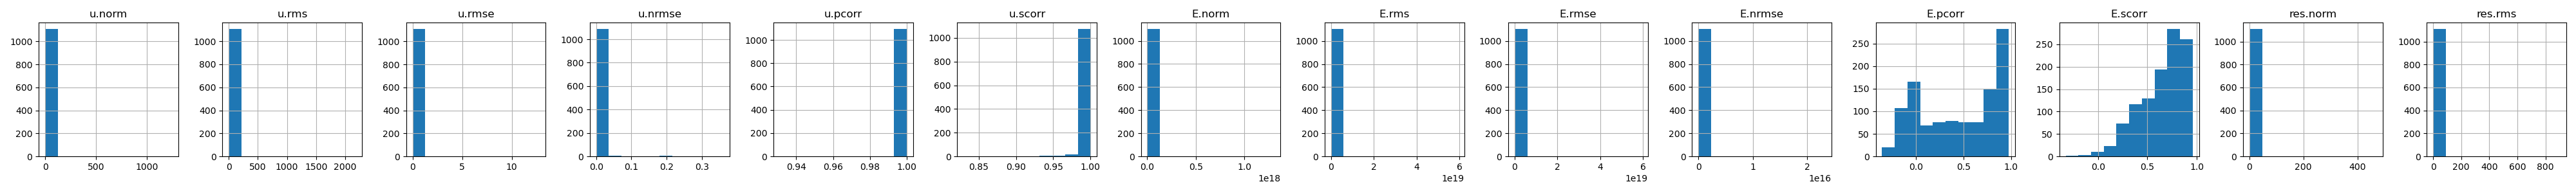

In [11]:
import matplotlib.pyplot as plt

df.hist(layout=(1,14), figsize=(40,3))
plt.gcf().tight_layout()